In [93]:

import pandas as pn
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sel
sel.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [94]:

dataframe=pn.read_csv("datasets/datasets/Salary_Data.csv")
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [95]:
#Here we are splitting the dataset into first and second training set and test set
first = df.iloc[:, :-1].values
second = df.iloc[:, 1].values
first_Train, first_Test, second_Train, second_Test = train_test_split(first,second, test_size=1/3,random_state = 0)

In [96]:
#trying to fit the simple linear regression with the training sets
regressoion = LinearRegression()
regressoion.fit(first_Train, second_Train)

Y_Prediction = regressoion.predict(first_Test)

In [97]:
# calculating the mean squared error with testing and prediction 
mean_squared_error(second_Test,Y_Prediction)

21026037.329511296

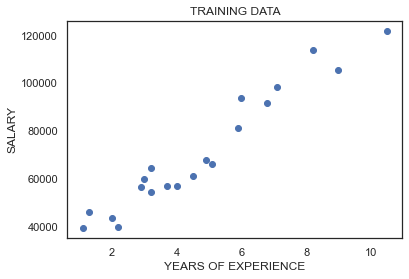

In [98]:
# here we are plotting the training and testing set 
plot.title('TRAINING DATA')
plot.xlabel('YEARS OF EXPERIENCE')
plot.ylabel('SALARY')
plot.scatter(first_Train, second_Train)
plot.show()

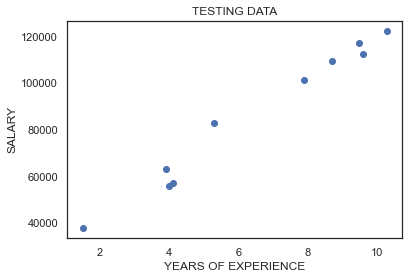

In [99]:
plot.title('TESTING DATA')
plot.xlabel('YEARS OF EXPERIENCE')
plot.ylabel('SALARY')
plot.scatter(first_Test, second_Test)
plot.show()

In [110]:
#READING THE CSV FILE
seconddataframe=pn.read_csv("datasets/datasets/K-Mean_Dataset.csv")
seconddataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [111]:
#we will remove the null values by the mean here 
first= seconddataframe.iloc[:,1:].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(first)
first = imputer.transform(first)

In [112]:
seconddataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

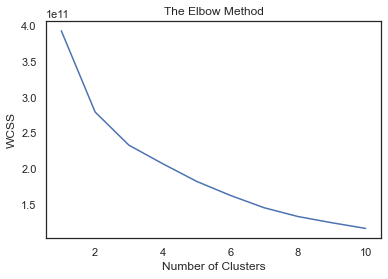

In [120]:
#USing the elbow method and finding good no of clusters by using k-means algorithm
neededlist = []
for index in range(1,11):
    kmeans = KMeans(n_clusters=index,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(first)
    neededlist.append(kmeans.inertia_)

plot.plot(range(1,11),wc)
plot.title('The Elbow Method')
plot.xlabel('Number of Clusters')
plot.ylabel('WCSS')
plot.show()

In [121]:

from sklearn.cluster import KMeans
# it is called the k in k means
noofclusters = 4  
km = KMeans(n_clusters=noofclusters)
km.fit(first)

KMeans(n_clusters=4)

In [118]:

secondclusterkmeans = km.predict(first)
from sklearn import metrics
score = metrics.silhouette_score(first, secondclusterkmeans)
print('Silhouette score for the above clustering:',score)

Silhouette score for the above clustering: 0.46583711203794576


In [119]:
columns=['']

In [107]:
scaler = preprocessing.StandardScaler()
scaler.fit(first)
first_scaled_array = scaler.transform(first)
first_scaled = pn.DataFrame(first_scaled_array, columns = seconddataframe.columns[1:])

In [108]:
from sklearn.cluster import KMeans
noofclusters = 4 
kmean= KMeans(n_clusters=noofclusters)
kmean.fit(first_scaled)

KMeans(n_clusters=4)

In [109]:

secondscaledclusterkmeans = kmean.predict(first_scaled)
from sklearn import metrics
score = metrics.silhouette_score(first_scaled, secondscaledclusterkmeans)
print('After applying K-MEANS on the scaled features the Silhouette score is  : ',score)

After applying K-MEANS on the scaled features the Silhouette score is  :  0.1976074492720698
